In [75]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [76]:
def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1] * x[i] + noise[i]

    return x, y

Text(0, 0.5, 'y (оценка температуры)')

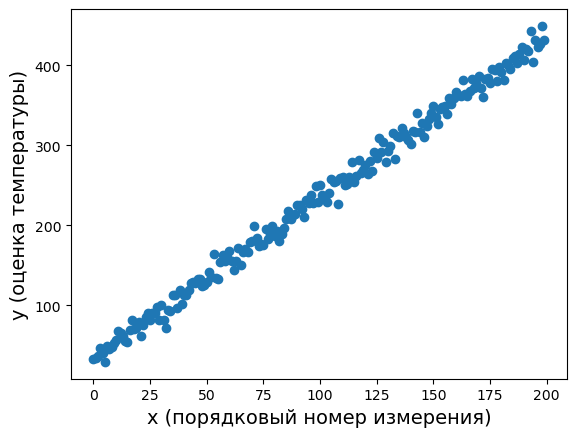

In [77]:
coef_true = [34.2, 2.]  # весовые коэффициенты
data_size = 200  # размер генерируемого набора данных
noise_sigma = 10  # СКО шума в данных
random_state = 42
x_1, y_1 = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

plt.plot(x_1, y_1, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

In [78]:
def coefficient_reg_inv(x, y):
    size = len(x)
    # формируем и заполняем матрицу размерностью 2x2
    A = np.empty((2, 2))
    A[[0], [0]] = sum((x[i]) ** 2 for i in range(0, size))
    A[[0], [1]] = sum(x)
    A[[1], [0]] = sum(x)
    A[[1], [1]] = size
    print(A)
    # находим обратную матрицу
    A = np.linalg.inv(A)
    # формируем и заполняем матрицу размерностью 2x1
    C = np.empty((2, 1))
    C[0] = sum((x[i] * y[i]) for i in range(0, size))
    C[1] = sum((y[i]) for i in range(0, size))

    print(C)
    # умножаем матрицу на вектор
    ww = np.dot(A, C)
    return ww[1], ww[0]


coefficient_reg_inv(x_1, y_1)

[[2.6467e+06 1.9900e+04]
 [1.9900e+04 2.0000e+02]]
[[6006666.52727855]
 [  46872.25925663]]


(array([33.93193341]), array([2.01436546]))

In [79]:
def test(args, values):
    size = args.size
    coef_a_1 = np.sum(np.power(args, 2))
    coef_b_1 = np.sum(args)

    coef_a_2 = np.sum(args)
    coef_b_2 = size

    sas = np.multiply(values.reshape(200,), args)

    free_1 = np.sum(sas)
    free_2 = np.sum(values)

    matrix = np.array([[coef_a_1, coef_b_1], [coef_a_2, coef_b_2]])
    vec = np.array([free_1, free_2])
    print(vec)
    return np.linalg.solve(matrix, vec)

test(x_1, y_1)

[6006666.52727855   46872.25925663]


array([ 2.01436546, 33.93193341])

In [80]:
from sklearn.linear_model import LinearRegression

# преобразование размерности массива x_scale для корректной работы model.fit
x_scale = x_1.reshape((-1, 1))
model = LinearRegression()
model.fit(x_scale, y_1)
print(model.intercept_, model.coef_)

[33.93193341] [[2.01436546]]


# Параболическая функция

In [81]:
def generate_data(coefficient, size: int, sigma):
    x = np.arange(0, size, 1)
    y = coefficient[0] * (np.power(x, 2)) + coefficient[1] * x + coefficient[2]
    noise = np.random.normal(loc=0, scale=sigma, size=size)  # noise generation
    y += noise
    return x, y

Text(0, 0.5, 'y (оценка температуры)')

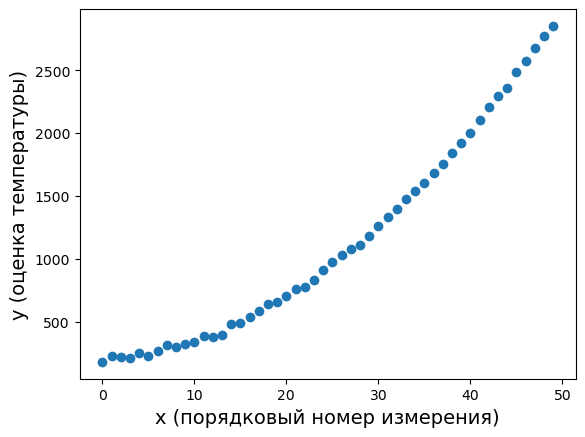

In [82]:
coef_true = [1, 5.4, 200]  # весовые коэффициенты
data_size = 50  # размер генерируемого набора данных
noise_sigma = 15  # СКО шума в данных
x_scale, y_estimate = generate_data(coef_true, data_size, noise_sigma)

plt.plot(x_scale, y_estimate, 'o')
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

In [83]:
z = np.poly1d(np.polyfit(x_scale, y_estimate, 2))
z

poly1d([  1.01141835,   4.94863087, 199.57309669])

In [84]:
def get_coefficients(x, y):
    size = x.size
    coef_a_1 = np.sum(np.power(x, 4))
    coef_a_2 = np.sum(np.power(x, 3))
    coef_a_3 = np.sum(np.power(x, 2))

    coef_b_1 = np.sum(np.power(x, 3))
    coef_b_2 = np.sum(np.power(x, 2))
    coef_b_3 = np.sum(x)

    coef_c_1 = np.sum(np.power(x, 2))
    coef_c_2 = np.sum(x)
    coef_c_3 = size

    free_1 = np.sum(y * np.power(x, 2))
    free_2 = np.sum(y * x)
    free_3 = np.sum(y)

    matrix = np.array([[coef_a_1, coef_b_1, coef_c_1], [coef_a_2, coef_b_2, coef_c_2], [coef_a_3, coef_b_3, coef_c_3]])
    vec = np.array([free_1, free_2, free_3])
    return np.linalg.solve(matrix, vec)

get_coefficients(x_scale, y_estimate)

array([  1.01141835,   4.94863087, 199.57309669])